In [2]:
# Definition of Working Folder

Dirname <- "/working/01_Machine_Learning/01_Appunti/Machine Learning with R"
Dirs <- list.dirs(path=file.path("~"),recursive=T)
dir_wd <- names(unlist(sapply(Dirs,grep,pattern=Dirname))[1])
dir_wd <- paste(dir_wd,'Dati',sep='/')
setwd(dir_wd)
cat("Current working folder is ' : ", getwd())

Current working folder is ' :  C:/Users/t004314/Documents/GitHub/working/01_Machine_Learning/01_Appunti/Machine Learning with R/Dati

## Example ##

### Estimating the quality of wines with regression trees and model trees ###

Step 1 – collecting data

In [3]:
wine <- read.csv("whitewines.csv")
str(wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


**Set fonts size in R plot**. You probably have discovered that R usually gives you different size of fonts in different figures. That is because a numerical value (cex in par function) giving the amount by which plotting text and symbols is magnified relative to a default value. This starts as ‘1’ when a device is opened, and is reset when the layout is changed, e.g. by setting ‘mfrow’. But the final fonts size for the main title (or axis, lab, sub) is determined by the product of the three variables, ps, cex, and cex.main (or cex.axis, cex.lab, cex.sub), respectively.

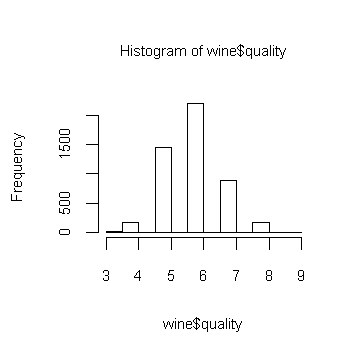

In [4]:
options(repr.plot.width=3, repr.plot.height=3) 
hist(wine$quality, font.main=1, cex.main=.75, cex.axis=.75, cex.lab=.75)

Our last step then is to divide into training and testing datasets. Since the wine
data set was already sorted into random order, we can partition into two sets of
contiguous rows as follows:

In [5]:
#install.packages("rpart")
library(rpart)
#install.packages("rpart.plot")
library(rpart.plot)

wine_train <- wine[1:3750, ]
wine_test <- wine[3751:4898, ]

In [6]:
m.rpart <- rpart(quality ~ ., data = wine_train)
m.rpart

n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 3140.06000 5.886933  
   2) alcohol< 10.85 2473 1510.66200 5.609381  
     4) volatile.acidity>=0.2425 1406  740.15080 5.402560  
       8) volatile.acidity>=0.4225 182   92.99451 4.994505 *
       9) volatile.acidity< 0.4225 1224  612.34560 5.463235 *
     5) volatile.acidity< 0.2425 1067  631.12090 5.881912 *
   3) alcohol>=10.85 1277 1069.95800 6.424432  
     6) free.sulfur.dioxide< 11.5 93   99.18280 5.473118 *
     7) free.sulfur.dioxide>=11.5 1184  879.99920 6.499155  
      14) alcohol< 11.85 611  447.38130 6.296236 *
      15) alcohol>=11.85 573  380.63180 6.715532 *

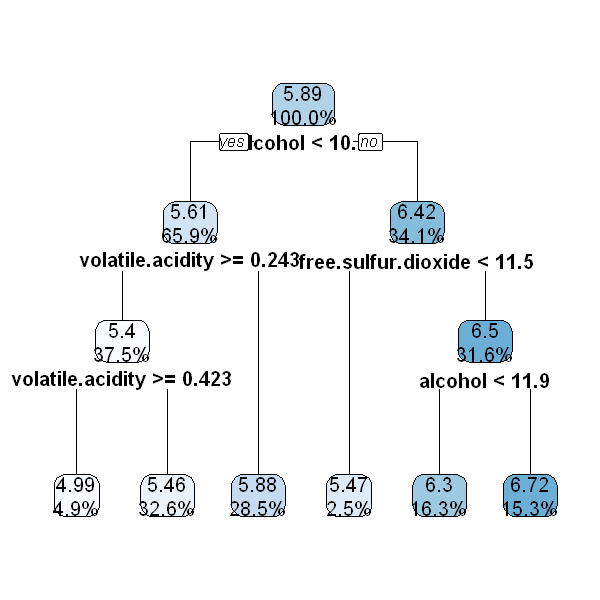

In [13]:
options(repr.plot.width=5, repr.plot.height=5) 
rpart.plot(m.rpart, digits=3)

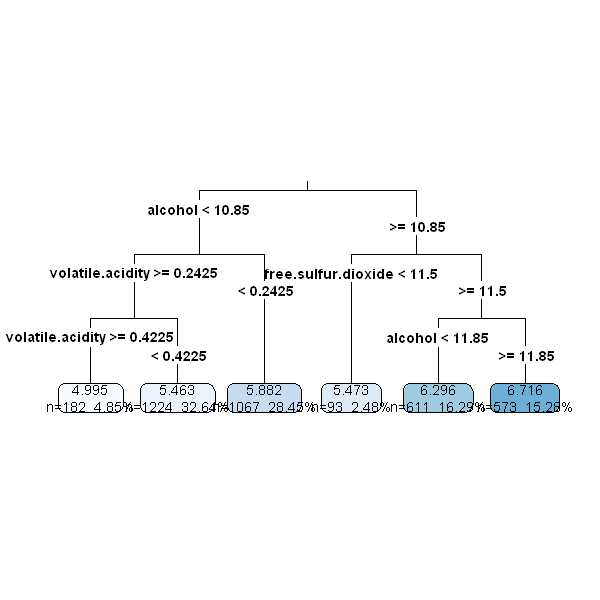

In [14]:
rpart.plot(m.rpart, digits = 4, fallen.leaves = TRUE, type = 3, extra = 101)

In [11]:
p.rpart <- predict(m.rpart, wine_test)